## Voting-Reggressor Algorithm

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset=pd.read_csv("age_experience_salary_data.csv")

In [25]:
dataset.columns

Index(['Age', 'Experience', 'Salary'], dtype='object')

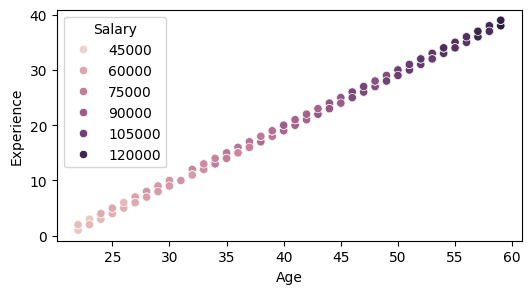

In [26]:

plt.figure(figsize=(6,3))
sns.scatterplot(x="Age",y="Experience",hue="Salary",data=dataset)
plt.show()

In [27]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(98.3501561001573, 98.61880083393868)

In [32]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.70770386970298, 97.07828466017075)

In [33]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(-3.7668783854843735, 0.029166721874340773)

In [34]:
from sklearn.ensemble import VotingRegressor

In [35]:
prd=[("lr",LinearRegression()),("dt",DecisionTreeRegressor()), ("sv",SVR())  ]

In [36]:
vr=VotingRegressor(estimators=prd,weights=[14,13,1])

In [37]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()), ('sv', SVR())],
                weights=[14, 13, 1])

In [38]:
vr.score(x_train,y_train)*100,vr.score(x_test,y_test)*100

(99.1878442364984, 98.14774838587608)

In [39]:
dic={
    "lr":lr.predict(x_test),
    "dt":dt.predict(x_test),
    "svm":sv.predict(x_test),
    "vr":vr.predict(x_test)
}

In [40]:
datasets= pd.DataFrame(dic)

In [41]:
datasets.head(4)

,lr,dt,svm,vr
0,104187.754534,103178.0,89345.771635,103188.869111
1,112868.045761,110579.0,89347.621488,113746.795077
2,110872.493006,106204.0,89347.633089,107936.233399
3,118854.704026,118330.0,89346.340560,117557.221319
